# Visualising Graph Embeddings
To provide us with some clues about how well they represent distances in the collection.

In [ ]:
# !pip uninstall -y umap-learn
!pip install umap-learn
!pip install datashader holoviews # for plotting

In [14]:
import numpy as np
import pandas as pd
from bokeh.plotting import show, output_notebook
import umap
import umap.plot
import os
import time
from scipy.spatial import distance
from sklearn.neighbors import KDTree

pd.set_option('display.max_colwidth', None)

## 1. Import data

In [2]:
embeddings_folder = "./dglke_best_model/RotatE_heritageconnector_0/" # best model according to dglke_logs/performance_logs.txt
mappings_folder = "../data/interim/"

entities = np.load(os.path.join(embeddings_folder, "heritageconnector_RotatE_entity.npy"))
relations = np.load(os.path.join(embeddings_folder, "heritageconnector_RotatE_relation.npy"))

entlabels = pd.read_csv(os.path.join(mappings_folder, "entities.tsv"), sep="\t", index_col=0, header=None, names=['label'])
rellabels = pd.read_csv(os.path.join(mappings_folder, "relations.tsv"), sep="\t", index_col=0, header=None, names=['label'])
entlabels = entlabels.fillna("") # 1 NaN - not sure why this is there

entities.shape, relations.shape

((645565, 800), (53, 400))

In [3]:
def map_label(l):
    if '/objects/' in l:
        return 'object'
    elif '/people/' in l:
        return 'people/orgs'
    elif 'wikidata' in l:
        return 'wikidata'
    elif 'blog.sciencemuseum' in l:
        return 'blog'
    elif 'journal.sciencemuseum' in l:
        return 'journal'
    else:
        return 'literal'
    
entlabels['group'] = entlabels['label'].apply(map_label)

entlabels.head()

,label,group
0,https://collection.sciencemuseumgroup.org.uk/people/cp28058,people/orgs
1,http://www.wikidata.org/entity/Q3568968,wikidata
2,https://collection.sciencemuseumgroup.org.uk/objects/co138741,object
3,plastic,literal
4,https://collection.sciencemuseumgroup.org.uk/people/cp28358,people/orgs


## 2. Analyse embeddings

In [4]:
def get_index_from_label(label):
    return entlabels.loc[entlabels['label'].str.contains(label), :].index.values[0]

def get_emb_from_label(label):
    idxs = entlabels.loc[entlabels['label'].str.contains(label), :].index.values
    if len(idxs) > 1:
        raise ValueError("more than one result returned")
        
    idx = idxs[0]
    
    return entities[idx, :]

In [5]:
difference_engine = get_emb_from_label('co526657')
babbage = get_emb_from_label('cp36993')
wheatstonebridge = get_emb_from_label('co33924')

distance.cosine(babbage, difference_engine), distance.cosine(babbage, wheatstonebridge)

(0.2882789969444275, 0.7537389546632767)

### 2.1 Nearest Neighbours


In [6]:
tree = KDTree(entities)

In [18]:
def get_nn_from_label(label, k):
    emb = get_emb_from_label(label)
    start = time.time()
    distances, idxs = tree.query([emb], k+1)
    end = time.time()
    print(f"query took {round(end-start, 2)} seconds")
    return entlabels.iloc[idxs[0]]

# Charles Babbage
get_nn_from_label('cp36993', 5)

query took 0.69 seconds


,label,group
24836,https://collection.sciencemuseumgroup.org.uk/people/cp36993,people/orgs
109322,https://collection.sciencemuseumgroup.org.uk/people/cp38764,people/orgs
392502,https://collection.sciencemuseumgroup.org.uk/people/cp51194,people/orgs
149743,https://collection.sciencemuseumgroup.org.uk/people/cp50100,people/orgs
110558,https://collection.sciencemuseumgroup.org.uk/people/cp111407,people/orgs
8595,https://collection.sciencemuseumgroup.org.uk/people/ap28821,people/orgs


In [19]:
# Early balance spring watch by Thomas Tompion
get_nn_from_label('objects/co33$', 10)

query took 0.68 seconds


,label,group
275640,https://collection.sciencemuseumgroup.org.uk/objects/co33,object
243156,https://collection.sciencemuseumgroup.org.uk/objects/co914,object
18461,https://collection.sciencemuseumgroup.org.uk/objects/co201,object
156104,https://collection.sciencemuseumgroup.org.uk/objects/co423550,object
92434,https://collection.sciencemuseumgroup.org.uk/objects/co981,object
29359,https://collection.sciencemuseumgroup.org.uk/objects/co238,object
7382,https://collection.sciencemuseumgroup.org.uk/objects/co216,object
106293,https://collection.sciencemuseumgroup.org.uk/objects/co423445,object
19029,https://collection.sciencemuseumgroup.org.uk/objects/co423394,object
18491,https://collection.sciencemuseumgroup.org.uk/objects/co218,object


In [22]:
# Sound Generator for Oramics Machine
get_nn_from_label('co8242587$', 20)

query took 0.69 seconds


,label,group
238889,https://collection.sciencemuseumgroup.org.uk/objects/co8242587,object
267442,https://collection.sciencemuseumgroup.org.uk/objects/co8242586,object
260444,https://collection.sciencemuseumgroup.org.uk/objects/co8242580,object
299097,https://collection.sciencemuseumgroup.org.uk/objects/co8242581,object
177841,https://collection.sciencemuseumgroup.org.uk/objects/co8242599,object
72087,https://collection.sciencemuseumgroup.org.uk/objects/co8242591,object
54147,https://collection.sciencemuseumgroup.org.uk/objects/co8242582,object
7791,https://collection.sciencemuseumgroup.org.uk/objects/co8242584,object
235171,https://collection.sciencemuseumgroup.org.uk/objects/co8242576,object
120536,https://collection.sciencemuseumgroup.org.uk/objects/co8188395,object


## 3. Plot embeddings

In [10]:
# create subset
seed = 42
rnd = np.random.RandomState(seed)
inds = rnd.choice(entities.shape[0], size=150000, replace=False)

entities_small = entities[inds, :]
entlabels_small = entlabels.iloc[inds]

entities_small.shape, entlabels_small.shape

((150000, 800), (150000, 2))

In [11]:
reducer = umap.UMAP()

In [12]:
ent_reduced = reducer.fit(entities_small)

<AxesSubplot:>

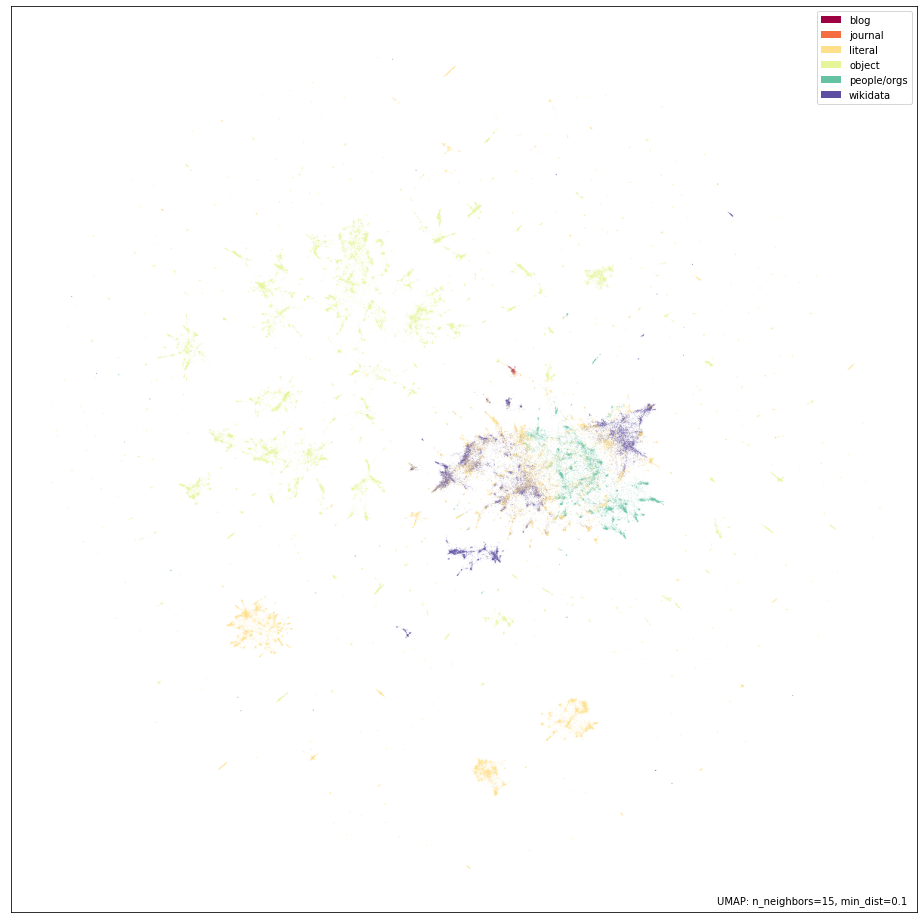

In [13]:
# interactive plotting is temperamental
# output_notebook()
# p = umap.plot.interactive(ent_reduced, labels=entlabels_small.group)
# show(p)

# ..so instead let's just create a static plot
umap.plot.points(ent_reduced, labels=entlabels_small.group, width=1200, height=1200)